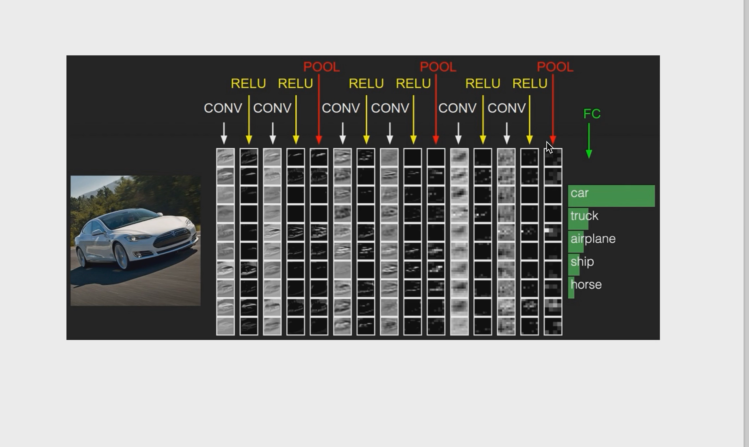

In [2]:

# convolutional neural network
import torch 
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np 


In [3]:
device=torch.device('cuda'if torch.cuda.is_available else 'cpu')

In [4]:
num_epochs=5
batch_size=4
learning_rate=0.001


In [6]:
transform=transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))]
)

In [7]:
train_dataset=torchvision.datasets.CIFAR10(root='./cifdata',train=True,download=True,transform=transform)
test_dataset=torchvision.datasets.CIFAR10(root='.cifdata',train=False,download=True,transform=transform)
train_loader=torch.utils.data.DataLoader(train_dataset,batch_size=batch_size,shuffle=True)
test_loader=torch.utils.data.DataLoader(test_dataset,batch_size=batch_size,shuffle=True)
classes=('plane', 'car','bird','cat','deer','dog','frog','horse','ship','truck')


100.0%


Extracting ./cifdata\cifar-10-python.tar.gz to ./cifdata


100.0%


Extracting .cifdata\cifar-10-python.tar.gz to .cifdata


In [10]:
# implementing convolution neuralnetwork 

class Convnet(nn.Module):
    def __init__(self):
        super(Convnet, self).__init__()
        self.conv1=nn.Conv2d(3, 6, kernel_size=5)# input channels =3 ,output channels = 6
        self.pooling=nn.MaxPool2d(2,2)
        self.conv2=nn.Conv2d(6,16,5)
        self.fc1=nn.Linear(16*5*5,120)
        self.fc2=nn.linear(120,84)
        self.fc2=nn.linear(84,10)
        
    def forward(self, x):
        pass

In [9]:
model=Convnet().to(device)
criterion=nn.CrossEntropyLoss()
optimizer=nn.AdamOptimizer(model.parameters(),lr=learning_rate)
n_total_steps=len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images=images.to(device)
        labels=labels.to(device)
        outputs=model(images)
        loss=criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if (i+1)%100==0:
            print(f'epoch [{epoch+1}/{num_epochs}], step [{i+1}/{n_total_steps}], loss={loss.item():.4f}')
print("Finished Training")
with torch.no_grad():
    correct=0
    total=0
    for images, labels in test_loader:
        images=images.to(device)
        labels=labels.to(device)
        outputs=model(images)
        
        _, predicted=torch.max(outputs.data, 1)
        total+=labels.size(0)
        correct+=(predicted==labels).sum().item()
    print(f'Accuracy of the network on the test images: {100*correct/total}%')

AttributeError: module 'torch.nn' has no attribute 'conv2d'